# Simulering av fallskjermhopp

I dette opplegget skal vi se på fallskjermhopp og rettlinjet bevegelse med varierende akselerasjon.

In [1]:
from pylab import plot, show, subplot, xlabel, ylabel, figure, legend, array

## Fallskjermhopp uten luftmotstand

Før vi tar hensyn til luftmotstand, ser vi på hvordan hastigheten til en fallskjermhopper ville vært i vakum. Vi starter med å tegne opp kreftene i dette systemet

<img src="bilder/fallskjermhopp_uten_luftmotstand.png" width="200px" />

Vi vet at tyngdekraften, $G$, er gitt ved

$$
G = m g,
$$

hvor $m$ er fallskjermhopperens masse i kg og $g = 9.81 m / s^2$. Basert på dette kan vi bruke Newton's andre lov som sier at

$$
\sum F = -G = m a.
$$

Det negative fortegnet kommer av at vi setter positiv retning oppover. Så kan vi bruke bevegelseslikningene for rettlinjet bevegelse med konstant akselerasjon for å simulere fallskjermhoppet. Bevegelseslikningene sier at

$$
h(t) = h_0 + v_0 t + \frac{1}{2} a t^2,
$$

og

$$
v(t) = v_0 + a t,
$$
hvor $h(t)$ og $v(t)$ er høyden og farted ved tid $t$, $h_0$ og $v_0$ er høyden og farten ved tid $t=0$ og $a$ er den konstante akselerasjonen. La oss lage to funksjoner, en for høyden og en for farten.


In [2]:
def finn_høyde(h0, v0, a, t):
    return h0 + v0*t + 0.5*a*t*t

def finn_fart(v0, a, t):
    return v0 + a*t

### Simulere fallskjermhopp
For å simulere fallskjermhoppet, må vi definere noen parametre: Fallskjermhopperens masse, $m$, gravitasjonskonstanten, $g$ og initialbetingelsene, $h_0$ og $v_0$. Vi må og definere hvor lenge fallskjermhopperen skal være i luften slik at vi kan finne hastigheten og høyden på det tidspunktet.

|Mening                   | Størrelse               | Verdi                               | Enhet |
|:------------------------|:------------------------|:------------------------------------|:-|
|Gravitasjonskonstant     | $g$                     | $9.81$                              | $\tfrac{\text{m}}{\text{s}^2}$ |
|Masse                    | $m$                     | $90$                                | $\text{kg}$  |
|Startshøyde              | $h_0$                   | $1000$                              | $\text{m}$   |
|Startshastighet          | $v_0$                   | $0$                                 | $\tfrac{\text{m}}{\text{s}}$ |

In [3]:
# Kraftparametre
g = 9.81  # m/s/s
m = 90 #kg

# Initialbetingelser
h0 = 1000  # m
v0 = 0     # m/s

# Simulering
t = 10

sum_krefter = -g*m
a = sum_krefter / m

h = finn_høyde(h0, v0, a, t)
v = finn_fart(v0, a, t)

print(f"Etter {t} sekunder er vi {h:.0f} m over bakken og har hastigheten {v:.0f} m/s")

Etter 10 sekunder er vi 509 m over bakken og har hastigheten -98 m/s


## Simulere frem til fallskjermhopperen treffer bakken

Problemet med forrige kode er at vi må vite tidspunktet fallskjermhopperen treffer bakken. Siden akselerasjonen er konstant, kan vi sette høyden lik $0$ og løse likningen

$$0 = h_0 + v_0 t + \frac{1}{2} a t^2.$$

Hvis vi putter inn verdiene for $h_0=1000 m, v_0=0 m/s$ og $a=-g$, får vi

$$ t = \sqrt{\frac{2000}{g}} = 14.28 s.$$

In [4]:
# Kraftparametre
g = 9.81  # m/s/s
m = 90 #kg

# Initialbetingelser
h0 = 1000  # m
v0 = 0     # m/s

# Simulering
t = 14.28

sum_krefter = -g*m
a = sum_krefter / m

h = finn_høyde(h0, v0, a, t)
v = finn_fart(v0, a, t)

print(f"Etter {t} sekunder er vi {h:.0f} m over bakken og har hastigheten {v:.0f} m/s")

Etter 14.28 sekunder er vi -0 m over bakken og har hastigheten -140 m/s


## Fallskjermhopp med luftmotstand

Nå har vi laget en fin liten simulering. Men, uten luftmotstand er det jo ikke mye poeng i å simulere et fallskjermhopp. For uten luftmotstand har ikke fallskjermen noen effekt. La oss starte med å tegne opp kreftene på fallskjermhopperen før han har slått ut fallskjermen, men nå ser vi ikke vekk fra luftmotstand.

<img src="bilder/fallskjermhopp_med_luftmotstand_1.png" width="200px" />

Her ser vi at summen av kreftene er gitt ved

$$ \sum F = D - G, $$

hvor $D$ er luftmotstanden. Men hva er egentlig $D$. Vel, vi har kanskje erfart at jo raskere vi sykler, jo mer luftmotstand får vi, så vi vet at $D$ avhenger av hastigheten. Men hva er da $D(v)$? Vel, med noe som heter *dimensjonsanalyse* (dette lærer man på universitetet) kan man se at luftmotstanden er gitt ved

$$D(v) = \frac{1}{2}\rho C A v^2,$$

hvor $\rho$ er volumtettheten til lufta, $A$ er tverrsnittsarealet til objektet som faller, $C$ er en konstant som beskriver hvor *aerodynamisk form* objektet som faller har og $v$ er hastigheten til det som faller. La oss starte med å lage en funksjon som regner ut luftmotstanden basert på disse størrelsene.

In [5]:
def luftmotstand(v, A, C, rho):
    return 0.5*A*C*rho*v*v

Nå som vi har en funksjon for å regne ut luftmotstanden må vi vite hva størrelsene $\rho$, $A$ og $C$ er. Disse størrelsene har vi for et menneske i tabellen under

|Mening                   | Størrelse               | Verdi                               | Enhet |
|:------------------------|:------------------------|:------------------------------------|:-|
|Gravitasjonskonstant     | $g$                     | $9.81$                              | $\tfrac{\text{m}}{\text{s}^2}$ |
|Masse                    | $m$                     | $90$                                | $\text{kg}$  |
|Startshøyde              | $h_0$                   | $1000$                              | $\text{m}$   |
|Startshastighet          | $v_0$                   | $0$                                 | $\tfrac{\text{m}}{\text{s}}$ |
|Luftens volumtetthet     | $\rho$                  | $1$                                 | $\tfrac{\text{kg}}{\text{m}^3}$ |
|Tverrsnittsareal         | $A_{\text{menneske}}$   | $0.7$                               | $\text{m}^2$ |
|Mål på aerodynamisk form | $C_{\text{menneske}}$   | $1.4$                               | |

La oss først prøve en simulering hvor vi bruker likningene for konstant akselerasjon men hvor vi tar med luftmotstand.

In [6]:
# Kraftparametre
g = 9.81
C = 1.4
A = 0.7
rho = 1
m = 90

# Initialbetingelser
h0 = 1000  # m
v0 = 0     # m/s

# Regn ut akselerasjonen
sum_krefter = -g*m + luftmotstand(v0, A, C, rho)
a = sum_krefter / m

# Simulering
t = 10
h1 = finn_høyde(h0, v0, a, t)
v1 = finn_fart(v0, a, t)

# Vis frem resultatet fra simuleringen
print(f"Etter {t} sekunder er vi {h:.0f} m over bakken og har hastigheten {v:.0f} m/s")

Etter 10 sekunder er vi -0 m over bakken og har hastigheten -140 m/s


Vi ser at vi får nøyaktig samme resultat som uten luftmotstand! Dette skyldes at hastigheten til å begynne med er null, og dermed vil luftmotstanden også være null. Hvis vi da antar konstant akselerasjon vil ikke simuleringen ta hensyn til luftmotstanden i det hele tatt. Luftmotstanden vil jo endre seg underveis, og dermed vil også akselerasjonen endre seg underveis. La oss se hvor mye akselerasjonen faktisk endret seg.

In [7]:
# Regn ut akselerasjonen på nytt
sum_F = -g*m + luftmotstand(v1, A, C, rho)
a1 = sum_F / m

# Vis frem akselerasjonen på starten og slutten av simuleringen
print(f"Akselerasjonen var {a:.2f} før simuleringen startet og {a1:.2f} etter simuleringen")

Akselerasjonen var -9.81 før simuleringen startet og 42.59 etter simuleringen


Akselerasjonen endret seg over 600%! Vi kan altså ikke si at vi har konstant akselerasjon her. Men hva om vi reduserer tiden på simuleringen? Da vil jo ikke hastigheten rekke å endre seg mye, og dermed vil heller ikke akselerasjonen endre seg mye. Vi kan f.eks. sette $t=0.01$ og kjøre koden en gang til.

In [8]:
# Kraftparametre
g = 9.81
C = 1.4
A = 0.7
rho = 1
m = 90

# Initialbetingelser
h0 = 1000  # m
v0 = 0     # m/s

# Regn ut akselerasjonen
sum_krefter = -g*m + luftmotstand(v0, A, C, rho)
a = sum_krefter / m

# Simulering
t = 0.01
h1 = finn_høyde(h0, v0, a, t)
v1 = finn_fart(v0, a, t)

# Regn ut akselerasjonen på nytt
sum_krefter = -g*m + luftmotstand(v1, A, C, rho)
a1 = sum_krefter / m

# Vis frem akselerasjonen på starten og slutten av simuleringen
print(f"Akselerasjonen var {a:.2f} før simuleringen startet og {a1:.2f} etter simuleringen")

Akselerasjonen var -9.81 før simuleringen startet og -9.81 etter simuleringen


Her ser vi at å anta konstant akselerasjon stemmer ganske bra hvis vi ser på en liten simulering. Men vi ville jo vite hastigheten når fallskjermhopperen treffer bakken. Og det gjør den ikke på så liten tid.

### Lengre simulering med luftmotstand

Så, for å kjøre en lengre simulering med luftmotstand må vi kjøre mange korte simuleringer etter hverandre. For hver simulering antar vi at akselerasjonen er konstant, og setter $h_0$ og $v_0$ lik verdien vi hadde forrige iterasjon.

Simuleringen krever altså en løkke, men vi vet jo ikke når fallskjermhopperen treffer bakken, og dermed heller ikke hvor lenge simuleringen skal vare. Vi kan gjøre en slik simulering med en `for-break` løkke, slik vi gjorde i introkurset, men for denne koden passer det bedre med en ny type løkke: `while`-løkken. En `while`-løkke er en bit med kode som gjentas mens en betingelse stemmer. Syntaksen ser slik ut:

In [9]:
x = 0
while x < 5:
    x = x + 1
    print(x)
print("Løkka er over")

1
2
3
4
5
Løkka er over


Vi har en betingelse: `x < 5`, og hvis den stemmer, så kjøres all koden inni løkka en gang. Etter at koden har blitt kjørt testes betingelsen på nytt, og hvis den stemmer gjentas løkka en gang til. Slik fortsetter Python frem til betingelsen ikke lengre stemmer. La oss bruke en slik løkke for simuleringen vår.

In [10]:
g = 9.81  # m/s/s
m = 90  # kg

h0 = 1000  # m
v0 = 0  # m/s

C = 1.4 
A = 0.7  # m^2
rho = 1  # kg/m^3

h = h0
v = v0
t = 0

dt = 0.01
while h > 0:
    sum_krefter = -g*m + luftmotstand(v, A, C, rho)
    a = sum_krefter/m
    
    h = finn_høyde(h, v, a, dt)
    v = finn_fart(v, a, dt)
    t = t + dt
    print(f"Etter tid {t} har vi høyde {h} m og hastighet {v} m/s")

Etter tid 0.01 har vi høyde 999.9995095 m og hastighet -0.0981 m/s
Etter tid 0.02 har vi høyde 999.9980380026198 m og hastighet -0.1961994760479 m/s
Etter tid 0.03 har vi høyde 999.9955855183383 m og hastighet -0.2942973802506937 m/s
Etter tid 0.04 har vi høyde 999.9921520681132 m og hastighet -0.3923926647657458 m/s
Etter tid 0.05 har vi høyde 999.9877376833801 m og hastighet -0.4904842818455628 m/s
Etter tid 0.060000000000000005 har vi høyde 999.9823424060515 m og hastighet -0.588571183882556 m/s
Etter tid 0.07 har vi høyde 999.9759662885149 m og hastighet -0.6866523234537935 m/s
Etter tid 0.08 har vi høyde 999.9686093936308 m og hastighet -0.7847266533657358 m/s
Etter tid 0.09 har vi høyde 999.9602717947305 m og hastighet -0.8827931266989528 m/s
Etter tid 0.09999999999999999 har vi høyde 999.9509535756127 m og hastighet -0.9808506968528163 m/s
Etter tid 0.10999999999999999 har vi høyde 999.9406548305406 m og hastighet -1.078898317590165 m/s
Etter tid 0.11999999999999998 har vi høyde

Etter tid 14.169999999999742 har vi høyde 525.4348781159531 m og hastighet -42.32819610524026 m/s
Etter tid 14.179999999999742 har vi høyde 525.0115933889733 m og hastighet -42.32874929069508 m/s
Etter tid 14.189999999999742 har vi høyde 524.5883031428875 m og hastighet -42.329299926462625 m/s
Etter tid 14.199999999999742 har vi høyde 524.1650074031339 m og hastighet -42.32984802426156 m/s
Etter tid 14.209999999999742 har vi høyde 523.7417061950339 m og hastighet -42.33039359575701 m/s
Etter tid 14.219999999999741 har vi høyde 523.3183995437922 m og hastighet -42.33093665256077 m/s
Etter tid 14.229999999999741 har vi høyde 522.8950874744983 m og hastighet -42.33147720623158 m/s
Etter tid 14.23999999999974 har vi høyde 522.4717700121257 m og hastighet -42.332015268275335 m/s
Etter tid 14.24999999999974 har vi høyde 522.0484471815336 m og hastighet -42.33255085014533 m/s
Etter tid 14.25999999999974 har vi høyde 521.6251190074667 m og hastighet -42.33308396324252 m/s
Etter tid 14.26999999

Etter tid 19.160000000000196 har vi høyde 313.85233738526387 m og hastighet -42.43615690439361 m/s
Etter tid 19.170000000000197 har vi høyde 313.4279755414601 m og hastighet -42.43621185636261 m/s
Etter tid 19.1800000000002 har vi høyde 313.00361314940625 m og hastighet -42.43626655440796 m/s
Etter tid 19.1900000000002 har vi høyde 312.57925021163567 m og hastighet -42.436320999702666 m/s
Etter tid 19.200000000000202 har vi høyde 312.1548867306701 m og hastighet -42.436375193414335 m/s
Etter tid 19.210000000000203 har vi høyde 311.7305227090195 m og hastighet -42.436429136705165 m/s
Etter tid 19.220000000000205 har vi høyde 311.3061581491823 m og hastighet -42.43648283073199 m/s
Etter tid 19.230000000000206 har vi høyde 310.8817930536454 m og hastighet -42.436536276646315 m/s
Etter tid 19.240000000000208 har vi høyde 310.4574274248842 m og hastighet -42.43658947559432 m/s
Etter tid 19.25000000000021 har vi høyde 310.0330612653626 m og hastighet -42.43664242871689 m/s
Etter tid 19.26000

## Lister og plotting
Nå har vi simulert et enkelt fallskjermhopp uten luftmotstand, men det krevde jo veldig mange tidssteg, så det blir vanskelig å se hvordan farten og hastigheten utvikler seg. Da kan det være fint å vise frem resultatet i et plott. For å gjøre det har vi tidligere brukt arrays, men nå vet vi jo ikke hvor mange element arrayen skal ha! Da passer det bedre å bruke lister.

Lister er litt som arrays, de er laget for å samle mange verdier i en variabel, men det er en veldig viktig forskjell. Arrayer er laget spesifikt for regning med tall, og har mange lure triks for at det skal gå så raskt som mulig, mens lister er laget for å samle vilkårlige variabler (f.eks. tekst). En annen viktig forskjell er at en array har fast lengde — det er vanskelig å utvide de. Lister derimot, kan vi veldig enkelt utvide med `append`-funksjonen. Syntaksen ser du under

In [11]:
# Opprett en navneliste
navneliste = ["Malin", "Arash", "Mari"]

# Vis frem navnelisten
print(navneliste)

# Vis frem et og et element fra navnelisten
print("Element nummer null er:", navneliste[0])
print("Element nummer en er:", navneliste[1])

# Legg til et navn
navneliste.append("Matteus")

# Vis frem den oppdaterte navnelisten
print(navneliste)

['Malin', 'Arash', 'Mari']
Element nummer null er: Malin
Element nummer en er: Arash
['Malin', 'Arash', 'Mari', 'Matteus']


### Simulering med lister

Nå har vi alle byggestenene vi trenger for simuleringen. Vi oppretter en liste som skal inneholde alle simuleringsverdiene for $h$, $v$ og $t$. Så har vi en while-løkke som simulerer fallskjermhopp så lenge det siste elementet i $h$-lista er større enn 0.

In [12]:
g = 9.81  # m/s/s
m = 90  # kg

h0 = 1000  # m
v0 = 0  # m/s

C = 1.4 
A = 0.7  # m^2
rho = 1  # kg/m^3

h = h0
v = v0
t = 0

h_liste = [h]
v_liste = [v]
t_liste = [t]

dt = 0.01
while h > 0:
    sum_krefter = -g*m + luftmotstand(v, A, C, rho)
    a = sum_krefter/m
    
    h = finn_høyde(h, v, a, dt)
    v = finn_fart(v, a, dt)
    t = t + dt
    
    h_liste.append(h)
    v_liste.append(v)
    t_liste.append(t)

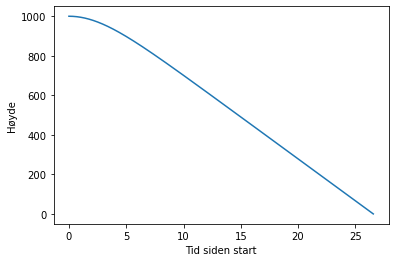

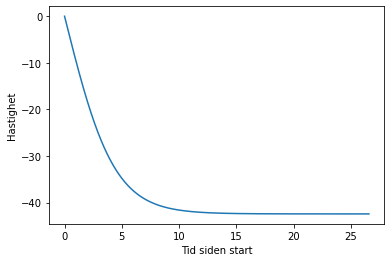

In [13]:
plot(t_liste, h_liste)
xlabel("Tid siden start")
ylabel("Høyde")
show()

plot(t_liste, v_liste)
xlabel("Tid siden start")
ylabel("Hastighet")
show()

Vi ser at hastigheten til fallskjermhopperen blir konstant etter omtrent 10 sekunder. Dette heter *terminalhastigheten*, og er hastigheten vi får når luftmotstanden er like sterk som tyngdekraften. Men denne hastigheten er alt for rask, så for å senke den, slik at fallskjermhopperen overlever hoppet, må vi også løse ut fallskjermen.

## Utølse fallskjermen

<div style="width:400px; margin: auto">
<img src="bilder/fallskjermhopp_med_luftmotstand_1.png" width="200px" align="left" />
<img src="bilder/fallskjermhopp_med_luftmotstand_2.png" width="200px" />
</div>
For å utløse fallskjermen må vi bruke en betingelse inne i while-løkka. Vi sjekker om tiden er større eller mindre enn utløsningstidspunktet, $t_{\text{utløsning}}$. Dersom $t > t_{\text{utløsning}}$, bruker vi parameterne til fallskjermen og hvis ikke, bruker vi parameterne til fallskjermhopperen. De fysiske parameterne til fallskjermen er i tabellen under.


|Mening                   | Størrelse               | Verdi                               | Enhet |
|:------------------------|:------------------------|:------------------------------------|:-|
|Gravitasjonskonstant     | $g$                     | $9.81$                              | $\tfrac{\text{m}}{\text{s}^2}$ |
|Masse                    | $m$                     | $90$                                | $\text{kg}$  |
|Startshøyde              | $h_0$                   | $1000$                              | $\text{m}$   |
|Startshastighet          | $v_0$                   | $0$                                 | $\tfrac{\text{m}}{\text{s}}$ |
|Luftens volumtetthet     | $\rho$                  | $1$                                 | $\tfrac{\text{kg}}{\text{m}^3}$ |
|Tverrsnittsareal         | $A_{\text{menneske}}$   | $0.7$                               | $\text{m}^2$ |
|Mål på aerodynamisk form | $C_{\text{menneske}}$   | $1.4$                               | |
|Tverrsnittsareal         | $A_{\text{fallskjerm}}$   | $44$                               | $\text{m}^2$ |
|Mål på aerodynamisk form | $C_{\text{fallskjerm}}$   | $1.8$                               | |

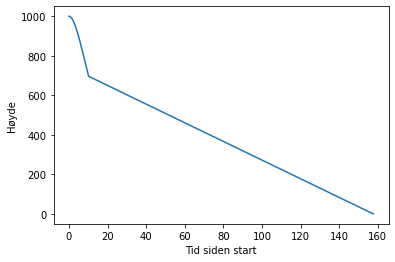

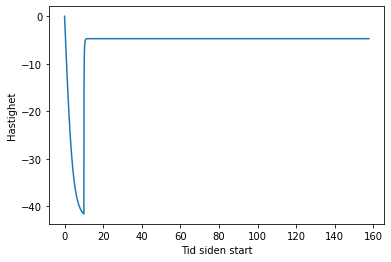

In [14]:
h = h0
v = v0
t = 0

h_liste = [h]
v_liste = [v]
t_liste = [t]

dt = 0.01
fallskjermtid = 10
while h > 0:
    if t < fallskjermtid:
        A = 0.7
        C = 1.4
    else:
        A = 44
        C = 1.8
    sum_krefter = -g*m + luftmotstand(v, A, C, rho)
    a = sum_krefter/m
    
    h = finn_høyde(h, v, a, dt)
    v = finn_fart(v, a, dt)
    t = t + dt
    
    h_liste.append(h)
    v_liste.append(v)
    t_liste.append(t)
    
plot(t_liste, h_liste)
xlabel("Tid siden start")
ylabel("Høyde")
show()

plot(t_liste, v_liste)
xlabel("Tid siden start")
ylabel("Hastighet")
show()

## Plotting av akselerasjonen

Vi ser at farten endrer seg utrolig raskt når vi løser ut fallskjermen. Men hva er egentlig akselerasjonen da? For å finne ut det lager vi en liste hvor vi tar vare på akselerasjonsverdiene også.

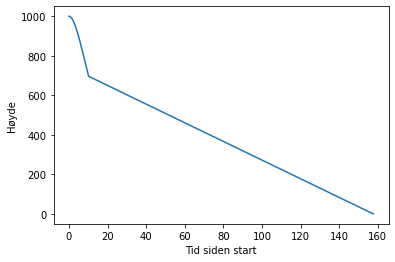

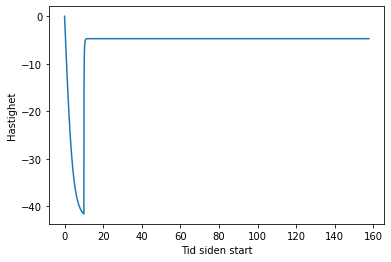

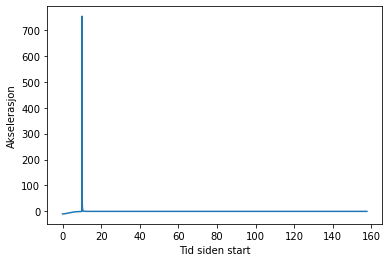

In [15]:
h = h0
v = v0
t = 0

h_liste = [h]
v_liste = [v]
t_liste = [t]
a_liste = [-g]

dt = 0.01
fallskjermtid = 10
while h > 0:
    if t < fallskjermtid:
        A = 0.7
        C = 1.4
    else:
        A = 44
        C = 1.8
    sum_krefter = -g*m + luftmotstand(v, A, C, rho)
    a = sum_krefter/m
    
    h = finn_høyde(h, v, a, dt)
    v = finn_fart(v, a, dt)
    t = t + dt
    
    h_liste.append(h)
    v_liste.append(v)
    t_liste.append(t)
    a_liste.append(a)
    

plot(t_liste, h_liste)
xlabel("Tid siden start")
ylabel("Høyde")
show()

plot(t_liste, v_liste)
xlabel("Tid siden start")
ylabel("Hastighet")
show()

plot(t_liste, a_liste)
xlabel("Tid siden start")
ylabel("Akselerasjon")
show()

Vi ser at akselerasjonen er over $700 \tfrac{\text{m}}{\text{s}^2}$. Det er omtrent ti ganger høyere enn den akselerasjonen som får (utrente) mennesker til å besvime! For at dette skal gå må vi derfor modifisere koden slik at fallskjermen løses ut saktere.

## Gradvis utløsing av fallskjermen
For å løse ut fallskjermen saktere, starter vi med spesifisere hvor mange sekunder det tar å løse ut fallskjermen, $\Delta t_{\text{utløsning}}$. For hver iterasjon sjekker vi da om 
$$t_{\text{utløsning}} < t < t_{\text{utløsning}} + \Delta t_{\text{utløsning}},$$
og hvis denne betingelsen er oppfylt, så øker vi $A$ og $C$ litt.

For å øke $A$ og $C$ litt, bruker vi denne formelen for $A$
$$A = \begin{cases}
A_\text{menneske} & , t < t_{\text{utløsning}} \\
A_\text{menneske} + \frac{t - t_\text{utløsning}}{\Delta t_{\text{utløsning}}}(A_\text{fallskjerm} - A_\text{menneske}) & , t_{\text{utløsning}} \leq t < t_{\text{utløsning}} + \Delta t_{\text{utløsning}} \\
A_\text{fallskjerm} & , t_{\text{utløsning}} + \Delta t_{\text{utløsning}} \leq t
\end{cases}$$
og denne formelen for $C$
$$C = \begin{cases}
C_\text{menneske} & , t < t_{\text{utløsning}} \\
C_\text{menneske} + \frac{t - t_\text{utløsning}}{\Delta t_{\text{utløsning}}}(C_\text{fallskjerm} - C_\text{menneske}) & , t_{\text{utløsning}} \leq t < t_{\text{utløsning}} + \Delta t_{\text{utløsning}} \\
C_\text{fallskjerm} & , t_{\text{utløsning}} + \Delta t_{\text{utløsning}} \leq t
\end{cases}$$

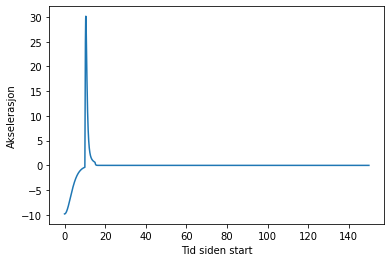

In [16]:
g = 9.81  # m/s/s
m = 90  # kg

h0 = 1000  # m
v0 = 0  # m/s

dt = 0.01

h = h0
v = v0
t = 0

h_liste = [h]
v_liste = [v]
t_liste = [t]
a_liste = [-g]

dt = 0.01

# Andre parametre
utløsningstidspunkt = 10
utløsningsvarighet = 5

while h > 0:
    if t < utløsningstidspunkt:
        A = 0.7
        C = 1.4
    elif t < utløsningstidspunkt + utløsningsvarighet:
        A_diff = 44 - 0.7
        C_diff = 1.8 - 1.4
        prosentfaktor_åpen = (t - utløsningstidspunkt) / utløsningsvarighet
        A = 0.7 + prosentfaktor_åpen * A_diff
        C = 1.4 + prosentfaktor_åpen * C_diff
    else:
        A = 44
        C = 1.8
    sum_F = -g*m + luftmotstand(v, A, C, rho)
    a = sum_F/m
    
    h = finn_høyde(h, v, a, dt)
    v = finn_fart(v, a, dt)
    t = t + dt
    
    h_liste.append(h)
    v_liste.append(v)
    t_liste.append(t)
    a_liste.append(a)

plot(t_liste, a_liste)
xlabel("Tid siden start")
ylabel("Akselerasjon")

show()